## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [120]:
## upload the dataset and import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'C:\Users\USER\Downloads\titanic\train.csv')
df.head(20)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 1. What does the dataset represent, and what are the key features?

In [9]:
# checking the various characteristics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# Looking fo null Values and sorting the null values


print(f'We have several null values in the Age column which can be sorted, in the cabin column has many blank values to do anything and on the embarked we have two null values')
df.isnull().sum()

We have several null values in the Age column which can be sorted, in the cabin column has many blank values to do anything and on the embarked we have two null values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. What is the overall structure of the dataset, and are there any missing or incorrect values?

The dimensions of the dataset (number of rows and columns), data types of each feature, and perform initial checks for missing or erroneous values.

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3. How do you handle missing values in the dataset?

Explain the strategies for dealing with missing values (e.g., imputation using the mean/median, dropping rows/columns, etc.) and why these methods were chosen.

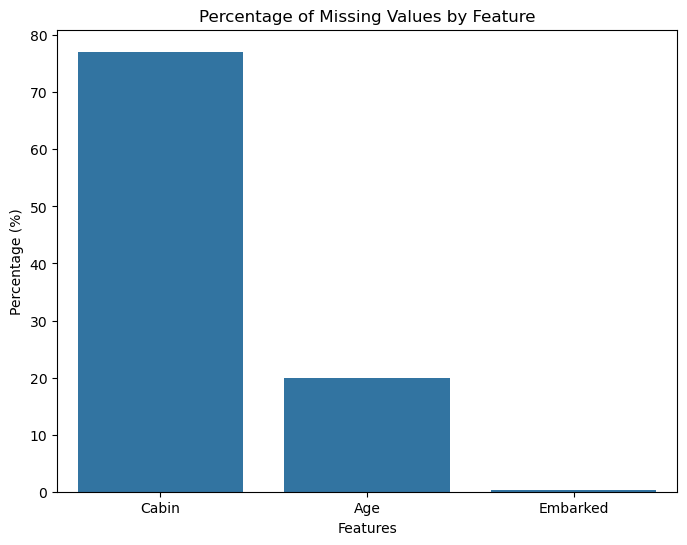

In [79]:
# Calculate percentage of missing values

missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort values in descending order for better visualization
missing_percentage = missing_percentage.sort_values(ascending=False)

#Visualization of the missing values

plt.figure(figsize=(8, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
 
plt.show()


The age distribution  of male on the titanic was highand the majority of the age group between the age 25 - 40 years old


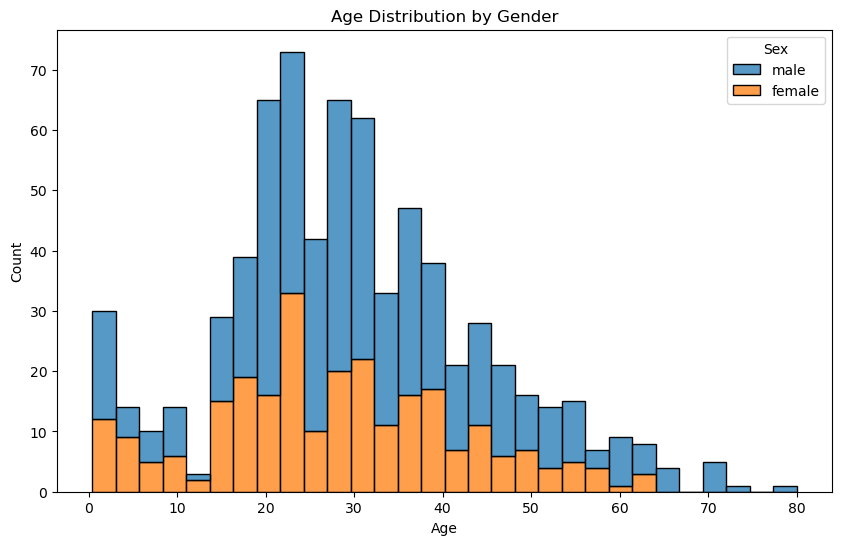

In [29]:
# Looking at the age distribution according to the gender

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')

print(f'The age distribution  of male on the titanic was high and the majority of the age group between the age 25 - 40 years old')
plt.show()


In [99]:
# Replacing null values 
df2 = df.copy()

#replacing null values with the mode age in the dataset
df2['Age'] = df2['Age'].fillna(df2['Age'].mode()[0])

#dropping the cabin column because of the high percentage of null values
df2 = df2.drop(columns=['Cabin'])
df2.isnull().sum()

df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 4. Are there any outliers in the data? How do you identify and handle them?
Demonstrate how you identified outliers using visualizations like box plots and what techniques were applied to deal with them (e.g., capping, removal).

InterQuantile Range is: 23.0896
Lower bound: -26.724
Upper bound: 65.6344


Text(0.5, 1.0, 'Simple line plot of fare')

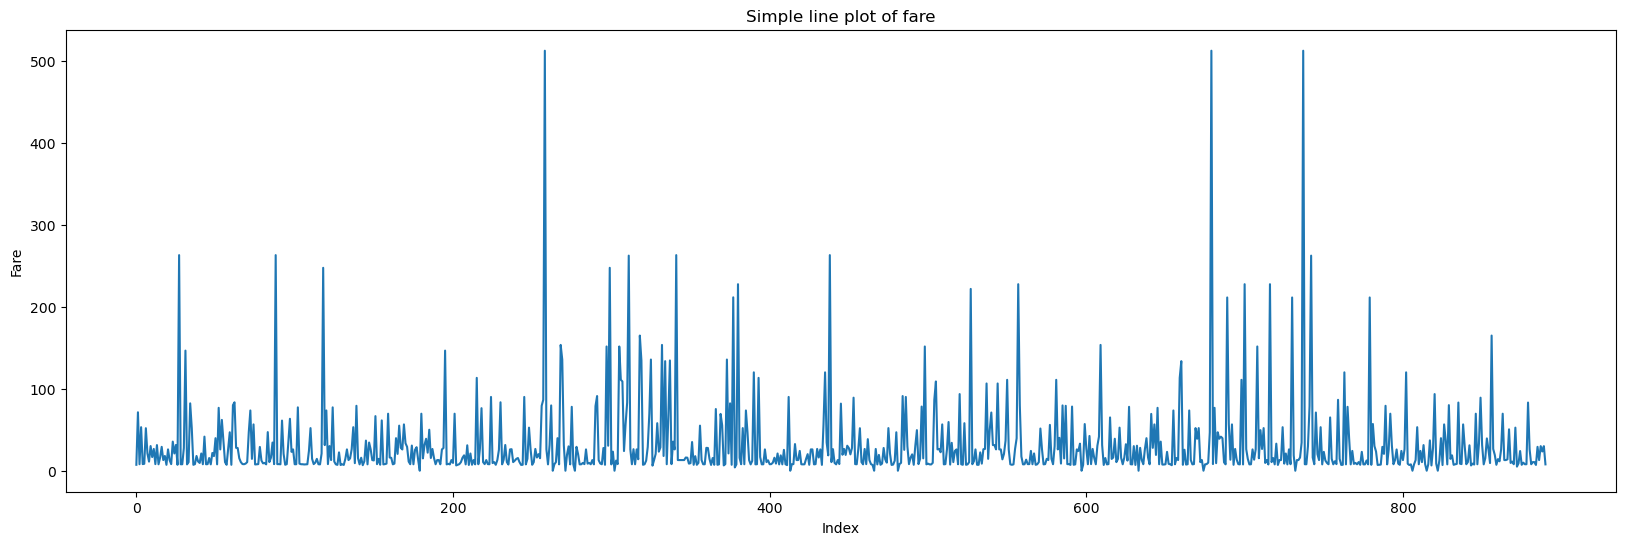

In [164]:
## outliers in age

#  Interquartile Range (IQR) method: Calculate the IQR and determine if there are any points lying outside the typical range.
#calculate the 25th percentile as Q1 and 75thpercentile as Q3

q1 = df2['Fare'].quantile(0.25)
q3 = df2['Fare'].quantile(0.75)

iqr = q3 - q1

print(f'InterQuantile Range is: {iqr}')

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')


# #filter dataset to remove outliers
zero_outliers = df2[(df2['Fare']>= lower_bound) & (df2['Fare']<= upper_bound)]

zero_outliers.head()

#Creating a line plot

y = df2['Fare']
x = df2['Name'].index

plt.figure(figsize=(20,6))
plt.plot(x,y)

#Labels and titles on the graph
plt.xlabel('Index')
plt.ylabel('Fare')
plt.title('Simple line plot of fare')


From scatter plot above, we can tell that there is a fair distribution of the Age. we can only see one outlier in age that is about 80 years old


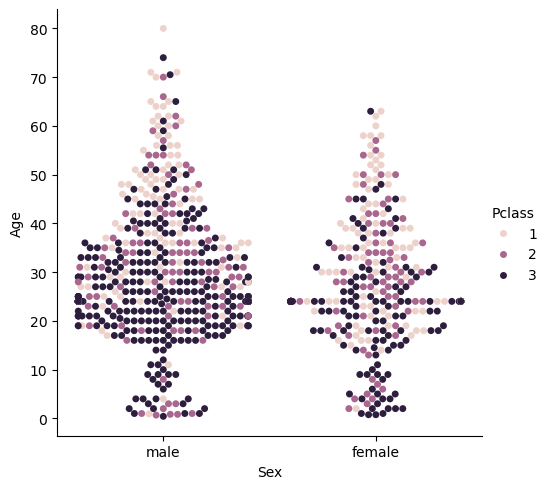

In [144]:
sns.catplot(y='Age', x='Sex', data = df2,  hue='Pclass', kind = "swarm")

print(f'From scatter plot above, we can tell that there is a fair distribution of the Age. we can only see one outlier in age that is about 80 years old')
plt.show()


## 6. How do categorical variables like gender and class relate to survival rates?
Perform analysis and visualizations (e.g., bar plots, cross-tabulations) to explore the relationship between categorical variables (Sex, Pclass) and survival (Survived).

From the data above, the survival rate of the passangers was greatly affected byt he Passenger class and the gender of the passanger. the survival rate for women was higher than that of men. First class passangers were given priority when boarding the lifeboats
Survived    0    1
Sex               
female     81  233
male      468  109


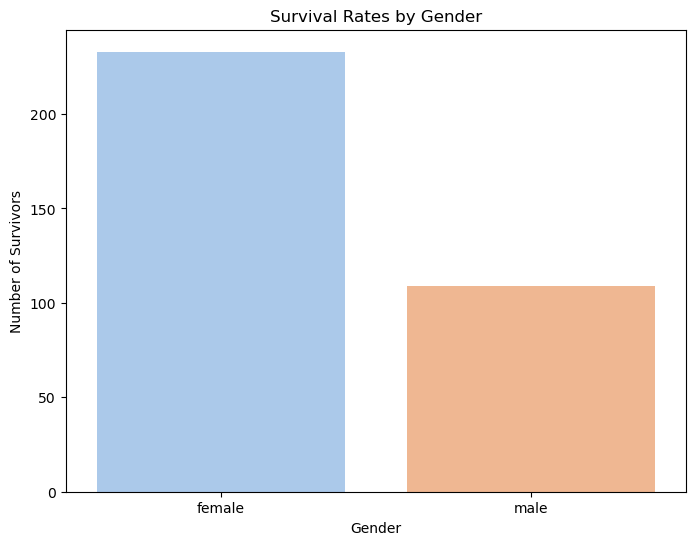

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


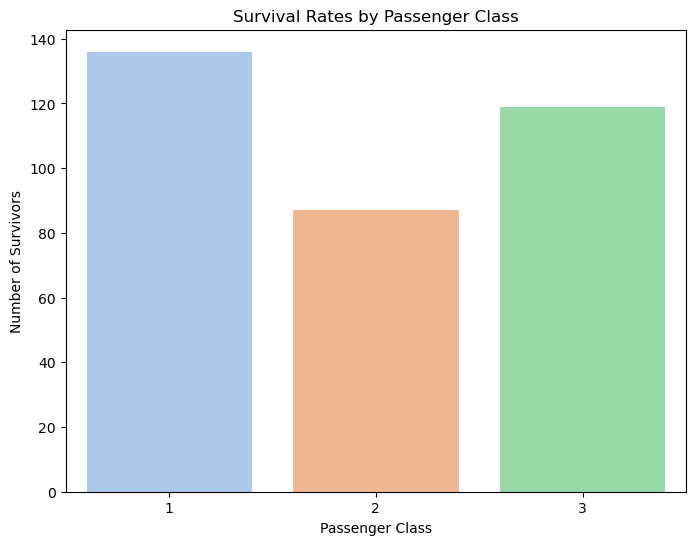

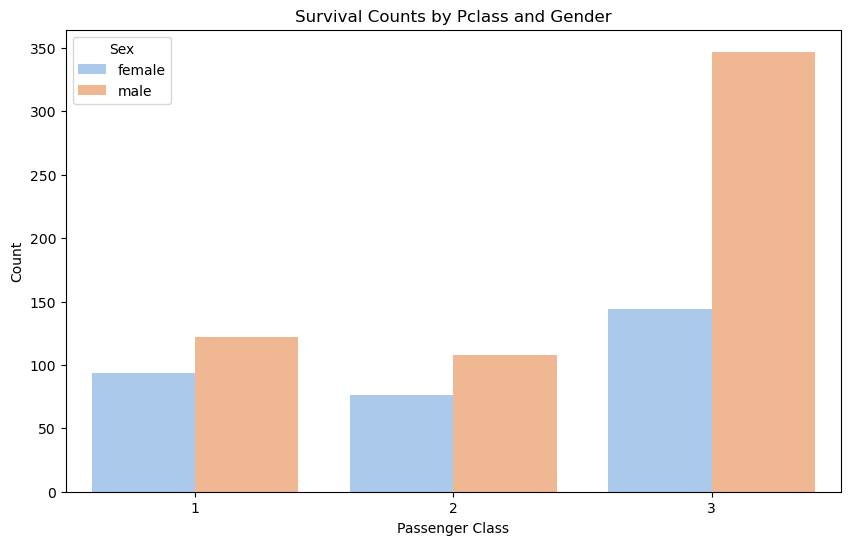

In [175]:
# Rate of Survival

print(f'From the data above, the survival rate of the passangers was greatly affected byt he Passenger class and the gender of the passanger. the survival rate for women was higher than that of men. First class passangers were given priority when boarding the lifeboats')

# 1. Cross-tabulation of Sex and Survived
crosstab_sex_survived = pd.crosstab(df['Sex'], df['Survived'])
print(crosstab_sex_survived)

# 2. Bar plot for Sex and Survival
plt.figure(figsize=(8, 6))
sns.barplot(x=crosstab_sex_survived.index, y=crosstab_sex_survived[1], palette='pastel')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()

# 3. Cross-tabulation of Pclass and Survived
crosstab_pclass_survived = pd.crosstab(df['Pclass'], df['Survived'])
print(crosstab_pclass_survived)

# 4. Bar plot for Pclass and Survival
plt.figure(figsize=(8, 6))
sns.barplot(x=crosstab_pclass_survived.index, y=crosstab_pclass_survived[1], palette='pastel')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()

# 5. Combined Bar Plot for Sex and Pclass Survival Rates
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='pastel')
plt.title('Survival Counts by Pclass and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()



## 7. How do you handle categorical variables when preparing data for analysis?
Discuss encoding techniques like one-hot encoding or label encoding to convert categorical features into a format that can be used in machine learning models.

In [190]:
## encoding all the categorical columns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

#make a copy of the dataset
df3 = df.copy()
df3['Sex'] = df3['Sex']

le = LabelEncoder()

cat_col = ['Sex']

#fit transform data
for col in cat_col:
    df3[col] = le.fit_transform(df3[col])
df3.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
341,342,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,19950,263.0000,C23 C25 C27,S
332,333,0,1,"Graham, Mr. George Edward",1,38.0,0,1,PC 17582,153.4625,C91,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",1,48.0,1,0,19996,52.0000,C126,S
487,488,0,1,"Kent, Mr. Edward Austin",1,58.0,0,0,11771,29.7000,B37,C
188,189,0,3,"Bourke, Mr. John",1,40.0,1,1,364849,15.5000,NaN,Q
805,806,0,3,"Johansson, Mr. Karl Johan",1,31.0,0,0,347063,7.7750,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",0,31.0,1,0,35273,113.2750,D36,C
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",0,23.0,1,0,35273,113.2750,D36,C
92,93,0,1,"Chaffee, Mr. Herbert Fuller",1,46.0,1,0,W.E.P. 5734,61.1750,E31,S


## 8. What insights can be drawn from the correlation between numerical variables?
Use a correlation matrix or heatmap to explore how numerical variables like Age, Fare, and SibSp are related and identify potential multicollinearity issues.

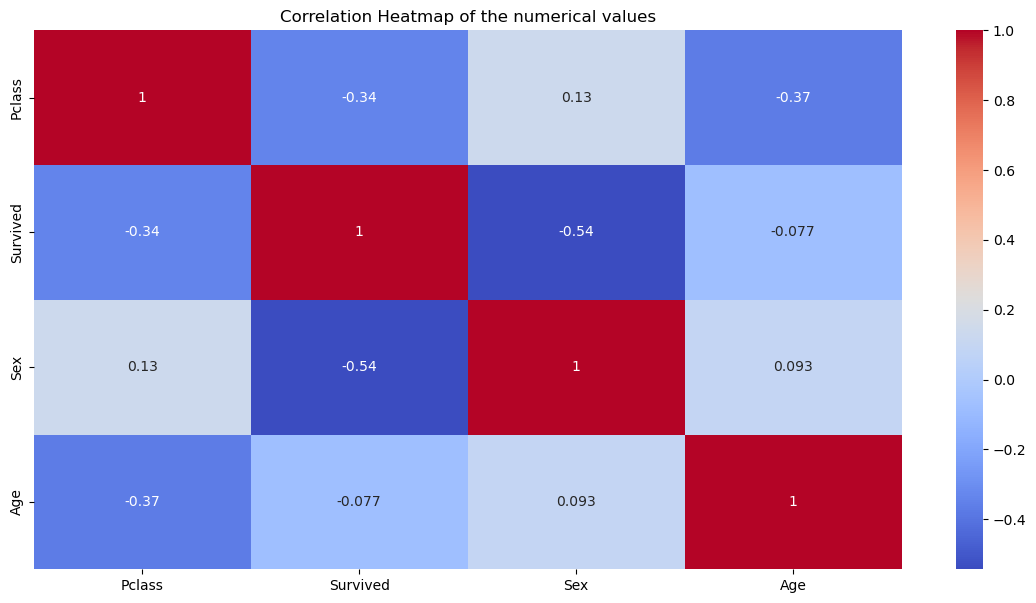

There are strong negative correlations between the the variables of sex, age and class in relation to the survival of passangers on the titanic


In [197]:
##create a data to use in the correlation
col = df3[['Pclass', 'Survived', 'Sex', 'Age']]
correlation = col.corr()


#Plot the heatmap to show the correlation
plt.figure(figsize=(14,7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of the numerical values')
plt.show()

print(f'There are strong negative correlations between the the variables of sex and survival rate in relation to the survival of passangers on the titanic')

A correlation of -0.54 between Sex and Survival Rate indicates a moderate negative relationship, suggesting that males were associated with lower survival rates compared to females in the Titanic dataset. This aligns with historical accounts of the Titanic disaster, where women and children were often prioritized for lifeboats. 